# __Ввдение__

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл: 

LIMIT_BAL:  размер кредитного лимита (в том числе и на семью клиента)

SEX: пол клиента (1 = мужской, 2 = женский )

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных). 

AGE: возраст в годах

PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре.

Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)

BILL_AMT1 - BILL_AMT6:  задолженность,  BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь 

PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре 

default - индикатор невозврата денежных средств


__Raw criteria__

Выполнение каждого пункта задания должно начинаться с графика с данными, которые вы собираетесь анализировать. 

Еще лучше, если вы разложите графики анализируемого фактора по переменной (default), на которую хотите изучить влияние этого фактора, и проинтерпретируете отличия в полученных распределениях.


При использовании статистических критериев необходимо убедиться в том, что условия их применимости выполняются. Например, если вы видите, что данные бинарные, то не нужно применять критерий Стьюдента.


При каждом использовании любого критерия необходимо указать, какая проверяется гипотеза, против какой альтернативы, чему равен достигаемый уровень значимости, принимается или отвергается нулевая гипотеза на уровне значимости 0.05. 

Если задача позволяет, нужно оценить размер эффекта и предположить, имеет ли этот результат практическую значимость. 
Выполненное задание необходимо представить в ipython-ноутбука.

In [6]:
import numpy as np
import pandas as pd
import math
from scipy.stats import chisquare
from statsmodels.stats.descriptivestats import sign_test

from statsmodels.sandbox.stats.multicomp import multipletests 

import scipy as sc

from statsmodels.stats.weightstats import *

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.multitest as smm

from itertools import combinations

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/tater/ML_coursera/ML/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['chisquare']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# __TASK #1__

Размер кредитного лимита (LIMIT_BAL). 
В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:   

a)  о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки  
b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.Значимы ли полученные результаты с практической точки зрения ?

In [7]:
# Input data for analysis
df = pd.read_csv('credit_card_default_analysis.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [9]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
df.isnull().any()

ID           False
LIMIT_BAL    False
SEX          False
EDUCATION    False
MARRIAGE     False
AGE          False
PAY_0        False
PAY_2        False
PAY_3        False
PAY_4        False
PAY_5        False
PAY_6        False
BILL_AMT1    False
BILL_AMT2    False
BILL_AMT3    False
BILL_AMT4    False
BILL_AMT5    False
BILL_AMT6    False
PAY_AMT1     False
PAY_AMT2     False
PAY_AMT3     False
PAY_AMT4     False
PAY_AMT5     False
PAY_AMT6     False
default      False
dtype: bool

__Пропущенных значений нет, модификации и замены данных не требуется__

In [11]:
# Проверим данные на нормальность графически и формально с помощью критерия Шапиро-Уилка.
# Будем учитывать влияние фактора default

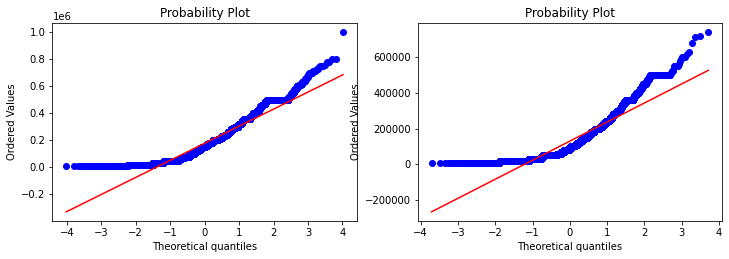

In [12]:
#1. a)

# Как видно далее на графиках, распределение отличается от нормального
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(df[df.default == 0].LIMIT_BAL, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(df[df.default == 1].LIMIT_BAL, dist="norm", plot=pylab)
pylab.show()


In [13]:
df[df.default == 1].LIMIT_BAL

0         20000
1        120000
13        70000
16        20000
21       120000
          ...  
29991    210000
29994     80000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 6636, dtype: int64

In [14]:
print('Shapiro-Wilk test for samples')

limit_normal_def_0 = stats.shapiro(df[df.default == 0].LIMIT_BAL)
limit_normal_def_p = limit_normal_def_0[1]

print('Mean corrected p-value for "default=0": %.6f' % limit_normal_def_p)

Shapiro-Wilk test for samples
Mean corrected p-value for "default=0": 0.000000


/home/tater/ML_coursera/ML/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
print('Shapiro-Wilk test for samples')

limit_normal_def_1 = stats.shapiro(df[df.default == 1].LIMIT_BAL)
limit_normal_def_p = limit_normal_def_1[1]

print('Mean corrected p-value for "default=0": %.6f' % limit_normal_def_p)

Shapiro-Wilk test for samples
Mean corrected p-value for "default=0": 0.000000


/home/tater/ML_coursera/ML/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Графические и формальные методы отвергают наличие нормальности в данных.
Визуализируем сами данные

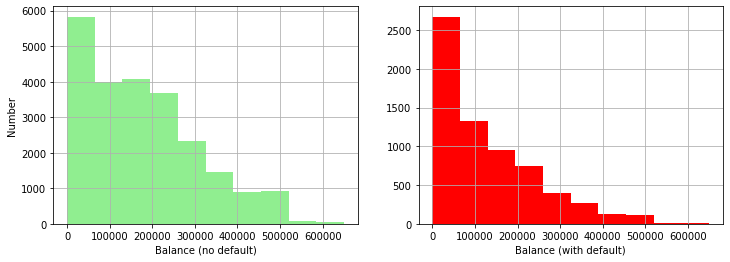

Avg and median Balance (no default):  178099.72607430234 150000.0 Avg and median Balance (with default):  130109.65641952984 90000.0


In [16]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.grid()
plt.hist(df[df.default == 0].LIMIT_BAL, color = 'lightgreen',range = (0,650000))
plt.xlabel('Balance (no default)')
plt.ylabel('Number')

plt.subplot(1,2,2)
plt.grid()
plt.hist(df[df.default == 1].LIMIT_BAL, color = 'r', range = (0,650000))
plt.xlabel('Balance (with default)')

plt.show()
print('Avg and median Balance (no default): ', df[df.default == 0].LIMIT_BAL.mean(), df[df.default == 0].LIMIT_BAL.median(),
      'Avg and median Balance (with default): ', df[df.default == 1].LIMIT_BAL.mean(), df[df.default == 1].LIMIT_BAL.median())

Полученные гистограммы показывают очевидную разницу в объеме выданного кредита в разрезе дефолта. Хвост(no default) более тяжелый, значительно больше кредитов с большими объемами, это и приведет к тому, что медианы будут отличаться значительно.

In [17]:
df[df.default == 0].LIMIT_BAL.values

array([ 90000,  50000,  50000, ..., 100000, 220000, 150000])

In [18]:
# Метод as_matrix применим в версии Python 2, для Python 3 разумнее использовать метод values для перевода типа
# Series или DataFrame в объемт ndarray - numpy array

In [19]:
#Воспользуемся бустрэпом
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

no_def_lim = list(map(np.median, get_bootstrap_samples(df[df.default == 0].LIMIT_BAL.values, 500)))
with_def_lim = list(map(np.mean, get_bootstrap_samples(df[df.default == 1].LIMIT_BAL.values, 500)))

print ('no_def_lim median: ', sum(no_def_lim) / float(len(no_def_lim)))
print ('with_def_lim median: ', sum(with_def_lim) / float(len(with_def_lim)))

delta_median_scores = list(map(lambda x: x[0] - x[1], zip(no_def_lim, with_def_lim)))

print ('delta ', sum(delta_median_scores) / float(len(delta_median_scores)))

print ("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

no_def_lim median:  150000.0
with_def_lim median:  130147.55274261603
delta  19852.44725738397
95% confidence interval for the difference between medians [17162.97468354 22642.96051838]


__Ответ 1.а: Медианные значения отличаются существенно. Доверительный интервал для разницы не содержит 0, разница статистически значима.__

Воспользуемся Ранговым критерием Манна-Уитни

In [20]:
from collections import namedtuple

In [21]:
MannwhitneyuResult = namedtuple('MannwhitneyuResult', ('statistic', 'pvalue'))
def tiecorrect(rankvals):
    arr = np.sort(rankvals)
    idx = np.nonzero(np.r_[True, arr[1:] != arr[:-1], True])[0]
    cnt = np.diff(idx).astype(np.float64)
    size = np.float64(arr.size)
    return 1.0 if size < 2 else 1.0 - (cnt**3 - cnt).sum() / (size**3 - size)

def mannwhitneyu(x, y, use_continuity=True, alternative=None):
    x = np.asarray(x)
    y = np.asarray(y)
    n1 = len(x)
    n2 = len(y)
    
    ranked = sc.stats.rankdata(np.concatenate((x, y)))
    rankx = ranked[0:n1]  # get the x-ranks
    u1 = n1*n2 + (n1*(n1+1))/2.0 - np.sum(rankx, axis=0)  # calc U for x
    u2 = n1*n2 - u1  # remainder is U for y
    T = tiecorrect(ranked)
    
    if T == 0:
        raise ValueError('All numbers are identical in mannwhitneyu')
        
    sd = np.sqrt(T * n1 * n2 * (n1+n2+1) / 12.0)

    meanrank = n1*n2/2.0 + 0.5 * use_continuity
    
    if alternative is None or alternative == 'two-sided':
        bigu = max(u1, u2)
    elif alternative == 'less':
        bigu = u1
    elif alternative == 'greater':
        bigu = u2
    else:
        raise ValueError("alternative should be None, 'less', 'greater' "
                         "or 'two-sided'")
        
    z = (bigu - meanrank) / sd
    if alternative is None:
        # This behavior, equal to half the size of the two-sided
        # p-value, is deprecated.
        p = sc.stats.distributions.norm.sf(abs(z))
    elif alternative == 'two-sided':
        p = 2 * sc.stats.distributions.norm.sf(abs(z))
    else:
        p = sc.stats.distributions.norm.sf(z)
    u = u2
    # This behavior is deprecated.
    if alternative is None:
        u = min(u1, u2)
    return MannwhitneyuResult(u, p)

print(mannwhitneyu(df[df.default == 0].LIMIT_BAL.values, df[df.default == 1].LIMIT_BAL.values))

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)


b) P value очень маленькое, нулевая гипотеза о равенстве распределений уверенно отклоняется. Другими словами, кто не может вернуть деньги за кредит, обычно получает меньшую сумму денег. Это потталкивает к идее, что аналитики банков, уже зная рискованность таких групп людей, выдают им меньшую сумму, в силу чего нужно осторожно использовать этот признак - риск возниновения переобучения.

# __Task #2__

Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

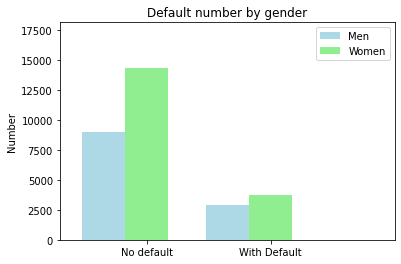

0.2416722745625841 0.20776280918727916


In [22]:
men = df[df.SEX == 1].default
women = df[df.SEX == 2].default

fig = plt.figure()
ax = fig.add_subplot(111)

N = 2
menMeans = [men.shape[0] - men.sum(), men.sum()]
womenMeans = [women.shape[0] -   women.sum(), women.sum()]

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, menMeans, width,
                color='lightblue',
                error_kw=dict(elinewidth=2,ecolor='red'))

rects2 = ax.bar(ind+width, womenMeans, width,
                    color='lightgreen',
                    error_kw=dict(elinewidth=2,ecolor='black'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,women.shape[0] + 44)
ax.set_ylabel('Number')
ax.set_title('Default number by gender')
xTickMarks = ['No default', "With Default"]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=0, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()
print(men.mean(), women.mean())

Женщины чаще берут кредит и чаще его возращают (21% женщин против 24% у мужчин, кто не вернул кредит). Проверим далее значимость этих утверждений. Воспользуемся биномиальным признаком для долей.

In [23]:
from statsmodels.stats.proportion import proportion_confint

In [24]:
#Применим интервальную оценку методом Вилсона для каждого значения из графика выше:
print('95%% confidence interval for %% of Men,  that didnt return loans: [%f, %f]' % proportion_confint(men.sum(), 
                                            men.shape[0],
                                            method = 'wilson'))
print('95%% confidence interval for %% of WoMen,  that didnt return loans: [%f, %f]' % proportion_confint(women.sum(), 
                                            women.shape[0],
                                            method = 'wilson'))

95% confidence interval for % of Men,  that didnt return loans: [0.234061, 0.249450]
95% confidence interval for % of WoMen,  that didnt return loans: [0.201917, 0.213733]


Доверительные интервалы не пересекаются, очень вероятно, что различие значимо в % возращаемых кредитов в зависимости пола. Далее определимся в значимости

In [25]:
#Используем Z-критерий для разности долей (независимые выборки)
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = sc.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)


def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - sc.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return sc.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - sc.stats.norm.cdf(z_stat)
    
print("95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(men, women))
print("p-value: ", proportions_diff_z_test(proportions_diff_z_stat_ind(men, women), 'greater'))

95% confidence interval for a difference between proportions: [0.024207, 0.043612]
p-value:  2.2364332608049153e-12


На уровне значимости 0.05 нулевая гипотеза о независимости дефолта от пола уверенно отвергается. При этом доверительный интервал для разности долей не содержит ноль, что потверждает наши рассуждения. Данные имеют практическую значимость, от есть признак пол явно имеет смысл включать в модель.

# __Task #3__

Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности, где значением ячейки была бы разность между количеством человек вернувших и не вернувших долг по каждому из значений образования. Похожи ли значения в этой таблице ? Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

In [26]:
df[["EDUCATION", "default"]]

,EDUCATION,default
0,2,1
1,2,1
2,2,0
3,2,0
4,2,0
...,...,...
29995,3,0
29996,3,0
29997,2,1
29998,3,1


In [27]:
pd.crosstab?

In [28]:
pd.crosstab(df.EDUCATION, df.default, margins=True, margins_name="Total")

default,0,1,Total
EDUCATION,,,
0,14,0,14
1,8549,2036,10585
2,10700,3330,14030
3,3680,1237,4917
4,116,7,123
5,262,18,280
6,43,8,51
Total,23364,6636,30000


In [29]:
df[(df.EDUCATION == 0) & (df.default == 0)].shape[0]

14

In [30]:
df[(df.EDUCATION == 0) & (df.default == 1)].shape[0]

0

In [31]:
diff_by_educ = np.array([])
for educ in range(0,7):
    diff = df[(df.EDUCATION == educ) & (df.default == 0)].shape[0] - df[(df.EDUCATION == educ) & (df.default == 1)].shape[0]
    diff_by_educ = np.append(diff_by_educ, diff)
    print(educ, diff, df[(df.EDUCATION == educ)].shape[0])
#print diff_by_educ

0 14 14
1 6513 10585
2 7370 14030
3 2443 4917
4 109 123
5 244 280
6 35 51


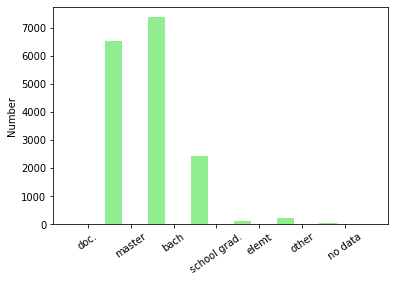

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

N = 7
menMeans = diff_by_educ

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.4                     # the width of the bars

## the bars
rects1 = ax.bar(ind, menMeans, width,
                color='lightgreen',
                error_kw=dict(elinewidth=2,ecolor='red'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylabel('Number')
xTickMarks = ['doc.', 'master', 'bach', 'school grad.', 'elemt', 'other', 'no data']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=35, fontsize=10)
plt.show()


Получаем, что у нас действительно неравномерное распределение по обучению, нормализуем количество, разделяя разницу на общее кол-во людей, которое получало кредит в рассматриваемой группе. Перестроим график.

0 1.0
1 0.8076523382144544
2 0.7626514611546685
3 0.7484238356721579
4 0.943089430894309
5 0.9357142857142857
6 0.8431372549019608


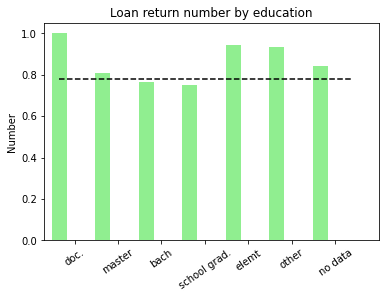

In [33]:
diff_by_educ = np.array([])
for educ in range(0,7):
    diff = 1.*(df[(df.EDUCATION == educ) & (df.default == 0)].shape[0] ) \
            /df[(df.EDUCATION == educ) ].shape[0]
    diff_by_educ = np.append(diff_by_educ, diff)
    print(educ, diff)
    
fig = plt.figure()
ax = fig.add_subplot(111)

N = 7
menMeans = diff_by_educ

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, menMeans, width,
                color='lightgreen',
                error_kw=dict(elinewidth=2,ecolor='red'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylabel('Number')
ax.set_title('Loan return number by education')
xTickMarks = ['doc.', 'master', 'bach', 'school grad.', 'elemt', 'other', 'no data']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)

threshold = 1 - df.default.mean()

ax.plot([0., 6.7], [threshold, threshold], "k--", label='Mean value')
plt.setp(xtickNames, rotation=35, fontsize=10)


plt.show()

Если отбросить 0-й тип обучения - степень доктора наук, в которых слишком мало данных. То __"elem"__ - наибольшая вероятность возрата долга, __"school grad"__  - наименьшая вероятность возрата. Далее проверим значимость

In [34]:
diff1 = df[(df.EDUCATION == 1) & (df.default == 0)].shape[0]
diff1

8549

In [35]:
diff_by_educ = np.array([])

diff1 = df[(df.EDUCATION == 1) & (df.default == 1)].shape[0] 
diff2 = df[(df.EDUCATION == 1) & (df.default == 0)].shape[0]

diff_by_educ = (np.append(diff1, diff2)).reshape((2,1)) 

for educ in range(2,7): 
    diff1 = df[(df.EDUCATION == educ) & (df.default == 1)].shape[0] 
    diff2 = df[(df.EDUCATION == educ) & (df.default == 0)].shape[0]
    
    k = (np.append(diff1, diff2)).reshape((2,1)) 
    diff_by_educ = np.concatenate((diff_by_educ, k), axis=1) 

print(diff_by_educ, end='\n')

def cramers_stat(confusion_matrix):
#используем поправку Йетса для малой выборки
    chi2 = sc.stats.chi2_contingency(confusion_matrix, correction=True)[0]
    n = confusion_matrix.sum() 
    return np.sqrt(1.*chi2 / (n*(min(confusion_matrix.shape)-1))) 

print("Cramer V: ", cramers_stat(diff_by_educ), "p value: ", sc.stats.chi2_contingency(diff_by_educ, correction= True)[1])

[[ 2036  3330  1237     7    18     8]
 [ 8549 10700  3680   116   262    43]]
Cramer V:  0.07286047087405424 p value:  1.4764557605044473e-32


Таким образом, нулевая гипотеза об отсутствии связи образования и уровня дефолта уверенно отвергается на уровне значимости 0.05. Значение V Крамера равно 0.073

# __Task #4__

Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

Значения: 0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных

In [36]:
pd.crosstab(df.MARRIAGE, df.default, margins=True, margins_name="Total")

default,0,1,Total
MARRIAGE,,,
0,49,5,54
1,10453,3206,13659
2,12623,3341,15964
3,239,84,323
Total,23364,6636,30000


In [37]:
diff_by_mar = np.array([])
for educ in range(0,4):
    diff = df[(df.MARRIAGE == educ) & (df.default == 0)].shape[0] - df[(df.MARRIAGE == educ) & (df.default == 1)].shape[0]
    diff_by_mar = np.append(diff_by_mar, diff)
    print(educ, diff, df[(df.MARRIAGE == educ) ].shape[0])

0 44 54
1 7247 13659
2 9282 15964
3 155 323


0 0.9074074074074074
1 0.7652829636137345
2 0.7907166123778502
3 0.739938080495356


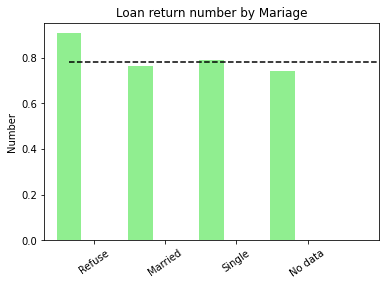

In [38]:
diff_by_mar = np.array([])
for educ in range(0,4):
    diff = 1.*(df[(df.MARRIAGE == educ) & (df.default == 0)].shape[0] ) \
            /df[(df.MARRIAGE == educ) ].shape[0]
    diff_by_mar = np.append(diff_by_mar, diff)
    print(educ, diff)
fig = plt.figure()
ax = fig.add_subplot(111)

N = 4
menMeans = diff_by_mar

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, menMeans, width,
                color='lightgreen',
                error_kw=dict(elinewidth=2,ecolor='red'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylabel('Number')
ax.set_title('Loan return number by Mariage')
xTickMarks = ['Refuse', 'Married', 'Single', 'No data']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)

threshold = 1 - df.default.mean()

ax.plot([0., 6.7], [threshold, threshold], "k--", label='Mean value')
plt.setp(xtickNames, rotation=35, fontsize=10)


plt.show()

In [39]:
diff_by_mar = np.array([]) 
diff1 = df[(df.MARRIAGE == 0) & (df.default == 1)].shape[0] 
diff2 = df[(df.MARRIAGE == 0) & (df.default == 0)].shape[0] 
diff_by_mar = (np.append(diff1, diff2)).reshape((2,1)) 

for educ in range(1,4): 
    diff1 = df[(df.MARRIAGE == educ) & (df.default == 1)].shape[0] 
    diff2 = df[(df.MARRIAGE == educ) & (df.default == 0)].shape[0] 
    k = (np.append(diff1, diff2)).reshape((2,1))
    diff_by_mar = np.concatenate((diff_by_mar, k), axis=1) 


def cramers_stat(confusion_matrix): 
    chi2 = sc.stats.chi2_contingency(confusion_matrix, correction= True)[0]
    n = confusion_matrix.sum() 
    print(n, confusion_matrix.shape)
    return np.sqrt(1.*chi2 / (n*(min(confusion_matrix.shape)-1))) 

print("Cramer V:", cramers_stat(diff_by_mar), "p-value:", sc.stats.chi2_contingency(diff_by_mar, correction= True)[1])

30000 (2, 4)
Cramer V: 0.034478203662766466 p-value: 8.825862457577375e-08


Таким образом нулевая гипотеза об отсутствии связи образования и уровня дефолта уверенно отвергается на уровне значимости 0.05. Значение V Крамера равно 0.034. В данном случае уровень __значимости значительно меньше__, но при этом сильно меньше 0.05

# __Task #5__

Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы:  
a) о равенстве медианных значений возрастов людей  
b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [40]:
pd.crosstab(df.AGE, df.default, margins=True, margins_name="Total")

default,0,1,Total
AGE,,,
21,53,14,67
22,391,169,560
23,684,247,931
24,827,300,1127
25,884,302,1186
26,1003,253,1256
27,1164,313,1477
28,1123,286,1409
29,1292,313,1605


In [41]:
diff_by_age = np.array([])
for age in range(21,80):
    diff = df[(df.AGE == age) & (df.default == 0)].shape[0] - df[(df.AGE == age) & (df.default == 1)].shape[0]
    diff_by_educ = np.append(diff_by_educ, diff)
    print(age, diff, df[(df.AGE == age)].shape[0])
#print diff_by_educ

21 39 67
22 222 560
23 437 931
24 527 1127
25 582 1186
26 750 1256
27 851 1477
28 837 1409
29 979 1605
30 847 1395
31 759 1217
32 708 1158
33 716 1146
34 700 1162
35 661 1113
36 600 1108
37 583 1041
38 556 944
39 556 954
40 496 870
41 454 824
42 424 794
43 370 670
44 376 700
45 385 617
46 256 570
47 261 501
48 258 466
49 214 452
50 209 411
51 164 340
52 148 304
53 177 325
54 135 247
55 95 209
56 80 178
57 68 122
58 60 122
59 41 83
60 21 67
61 14 56
62 30 44
63 15 31
64 13 31
65 14 24
66 11 25
67 6 16
68 3 5
69 9 15
70 6 10
71 3 3
72 1 3
73 -2 4
74 1 1
75 1 3
76 0 0
77 0 0
78 0 0
79 1 1


In [42]:
# Проверим данные на нормальность графически и формально с помощью критерия Шапиро-Уилка.
# Будем учитывать влияние фактора default

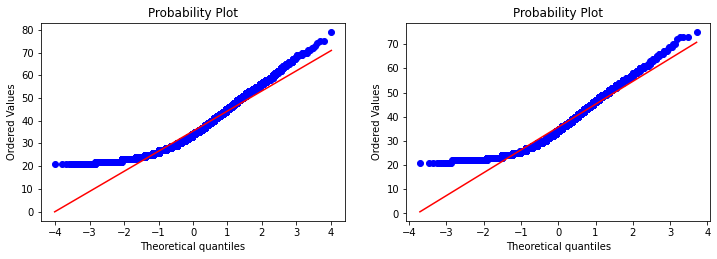

In [43]:
# Как видно далее на графиках, распределение отличается от нормального
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(df[df.default == 0].AGE, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(df[df.default == 1].AGE, dist="norm", plot=pylab)
pylab.show()

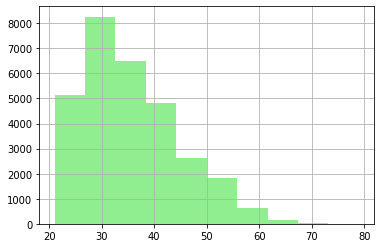

In [44]:
pylab.hist(df.AGE, color="lightgreen", label="age")
pylab.grid()
pylab.show()

In [45]:
print('Shapiro-Wilk test for samples')

limit_normal_def_0 = stats.shapiro(df[df.default == 0].AGE)
limit_normal_def_p = limit_normal_def_0[1]

print('Mean corrected p-value for "default=0": %.6f' % limit_normal_def_p)

Shapiro-Wilk test for samples
Mean corrected p-value for "default=0": 0.000000


/home/tater/ML_coursera/ML/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
print('Shapiro-Wilk test for samples')

limit_normal_def_1 = stats.shapiro(df[df.default == 1].AGE)
limit_normal_def_p = limit_normal_def_1[1]

print('Mean corrected p-value for "default=0": %.6f' % limit_normal_def_p)

Shapiro-Wilk test for samples
Mean corrected p-value for "default=0": 0.000000


/home/tater/ML_coursera/ML/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



# Ранговый критерий Манна-Уитни для нахождения разности средних величин

In [47]:
print(mannwhitneyu(df[df.default == 0].AGE.values, df[df.default == 1].AGE.values))

MannwhitneyuResult(statistic=76966879.5, pvalue=0.1862517717449308)


Критерий Манна-Уитни на уровне значимости 0.05 нулевую гипотезу о равенстве средних __не отклоняет__

# Применим перестановочный критерий для нахождения разности средних величин

In [48]:
AGE_def_0 = df[df.default == 0].AGE
AGE_def_1 = df[df.default == 1].AGE

$H_0\colon \mathbb{E}(X_1 - X_2) = 0$

$H_1\colon \mathbb{E}(X_1 - X_2) \neq 0$

In [49]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [50]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [51]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

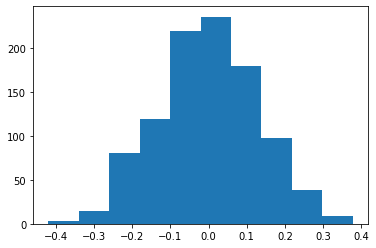

In [52]:
pylab.hist(permutation_zero_dist_ind(AGE_def_0, AGE_def_1, max_combinations = 1000))
pylab.show()

In [53]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [54]:
print("p-value: %f" % permutation_test(AGE_def_0, AGE_def_1, max_permutations = 10000))

p-value: 0.017400


Перестановочный критерий __отвергает гипотезу__ о равенстве средних

# Проверка гипотез о равенстве медиан при помощи бутстрепа

H0: медиана возраста при невозврате кредита равна медиане возраста при возврате кредита  
H1: общая гипотеза, что медианы не равны между собой

In [55]:
print("interval of median of weight [%f %f]" % zconfint(df[df.default == 0].AGE))

interval of median of weight [35.300871 35.533661]


In [56]:
print("interval of median of weight [%f %f]" % zconfint(df[df.default == 1].AGE))

interval of median of weight [35.492515 35.958962]


Populating the interactive namespace from numpy and matplotlib


/home/tater/ML_coursera/ML/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['diff']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


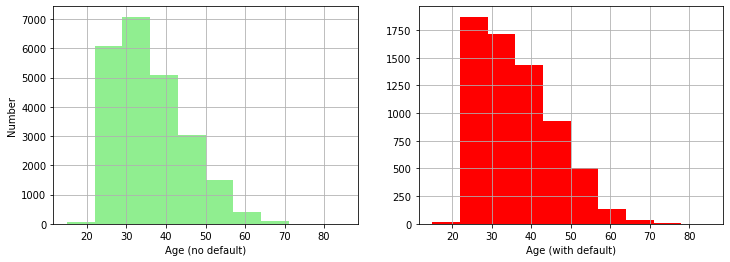

Avg and median Age (no default):  35.417265879130284 34.0 Avg and median Age (with default):  35.72573839662447 34.0


In [57]:
%pylab inline
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.grid()
plt.hist(df[df.default == 0].AGE, color = 'lightgreen',range = (15,85))
plt.xlabel('Age (no default)')
plt.ylabel('Number')

plt.subplot(1,2,2)
plt.grid()
plt.hist(df[df.default == 1].AGE, color = 'r', range = (15,85))
plt.xlabel('Age (with default)')

plt.show()
print('Avg and median Age (no default): ', df[df.default == 0].AGE.mean(), df[df.default == 0].AGE.median(),\
      'Avg and median Age (with default): ', df[df.default == 1].AGE.mean(), df[df.default == 1].AGE.median())

In [59]:
#Воспользуемся бустрэпом
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

no_def_age = list(map(np.median, get_bootstrap_samples(df[df.default == 0].AGE.values, 500)))
with_def_age = list(map(np.mean, get_bootstrap_samples(df[df.default == 1].AGE.values, 500)))

print ('no_def_age median: ', sum(no_def_age) / float(len(no_def_age)))
print ('with_def_age median: ', sum(with_def_age) / float(len(with_def_age)))

delta_median_scores = list(map(lambda x: x[0] - x[1], zip(no_def_age, with_def_age)))

print ('delta ', sum(delta_median_scores) / float(len(delta_median_scores)))

print ("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

no_def_age median:  34.0
with_def_age median:  35.719643459915616
delta  -1.7196434599156118
95% confidence interval for the difference between medians [-1.96035262 -1.49049503]


Медианные значения отличаются __существенно__. Доверительный интервал для разницы не содержит 0, разница статистически значима.